# Lista 03 - ICs + Bootstrap

In [1]:
# -*- coding: utf 8

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

plt.style.use('seaborn-colorblind')
plt.ion()

# Exercício 01:
Vamos utilizar a base de dados de recém-nascidos disponibilizada no exercício.

In [2]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.describe()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,3.386703,279.101363,27.228279,1.626855,3.642307
std,0.519609,16.010305,5.817839,0.064163,0.587807
min,1.559222,148.000000,15.000000,1.346200,2.466407
25%,3.061746,272.000000,23.000000,1.574800,3.238930
50%,3.401940,280.000000,26.000000,1.625600,3.543687
75%,3.713785,288.000000,31.000000,1.676400,3.940580
max,4.989512,353.000000,45.000000,1.828800,7.087375


A) Plote uma PDF dos dados da coluna "Gestational Days".

279.1013628620102


(array([ 24.,  10.,  10.,   5.,   6.,  13.,   6.,   3.,   5.,   7.,   6.,
          5.,   6.,   4.,   9.,   0.,  14.,  14.,   0.,   9.,   6.,   7.,
          3.,   9.,  17.,   0.,  18.,   0.,  22.,   0.,  16.,   0.,  27.,
         12.,  23.,  15.,  28.,  41.,   0.,  53.,  15.,  26.,  68.,  25.,
         20.,  60.,  75.,  71.,  76., 285.]),
 array([6.66821954e-17, 4.98559256e-04, 9.97118512e-04, 1.49567777e-03,
        1.99423702e-03, 2.49279628e-03, 2.99135554e-03, 3.48991479e-03,
        3.98847405e-03, 4.48703331e-03, 4.98559256e-03, 5.48415182e-03,
        5.98271107e-03, 6.48127033e-03, 6.97982959e-03, 7.47838884e-03,
        7.97694810e-03, 8.47550736e-03, 8.97406661e-03, 9.47262587e-03,
        9.97118512e-03, 1.04697444e-02, 1.09683036e-02, 1.14668629e-02,
        1.19654221e-02, 1.24639814e-02, 1.29625407e-02, 1.34610999e-02,
        1.39596592e-02, 1.44582184e-02, 1.49567777e-02, 1.54553369e-02,
        1.59538962e-02, 1.64524555e-02, 1.69510147e-02, 1.74495740e-02,
        1.

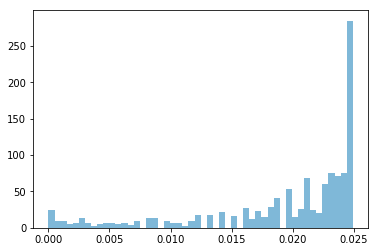

In [71]:
from scipy.stats import norm
mean = np.mean(df['Gestational Days'])
std = np.std(df['Gestational Days'])

print(mean)

plt.hist(norm.pdf(df['Gestational Days'], mean, std), bins=50, density=False, alpha=0.5)

B) Para o número de dias de gestação, determine com 95% de o Intervalo de Confiança. Não utilize a técnica de bootstrap.

Retorne uma lista com os valores inferior e superior do intervalo de confiança.
Exemplo:
```python
return [inferior,superior]
```

In [67]:
import scipy as sp                                                         
import scipy.stats                                                         

def calcula_IC_gestacao(df):
    conf_int = scipy.stats.norm.interval(0.95, loc=mean, scale=std) 
    return(conf_int[0], conf_int[1])
calcula_IC_gestacao(df)

(247.73510868282187, 310.46761704119854)

C) Na função abaixo, retorne o número da opção que melhor define o que indica o Intervalo de Confiança:

    1: A média da amostra está com 95% de probabilidade dentro do intervalo
    2: 95% dos valores da população estão dentro do intervalo
    3: O intervalo inclui a média da população com 95% de probabilidade
    4: 5% da amostra está a mais que 1.96 de distância da média da população
    5: Nenhuma das anteriores

In [76]:
def resposta():
    return 3
resposta()

3

# Exercício 02:

Agora vamos calcular intervalos de confiança utilizando bootstrap.

A) Para a coluna "Maternal Age", plote um histograma dos valores.

(array([ 1.,  0.,  0.,  7., 15.,  0., 49., 57.,  0., 65., 77.,  0., 90.,
        83.,  0., 75., 82.,  0., 80., 64.,  0., 61., 61.,  0., 41., 36.,
         0., 42., 31.,  0., 29., 24.,  0., 27., 18.,  0., 22., 11.,  0.,
        14.,  4.,  0.,  6.,  1.,  1.]),
 array([15.        , 15.66666667, 16.33333333, 17.        , 17.66666667,
        18.33333333, 19.        , 19.66666667, 20.33333333, 21.        ,
        21.66666667, 22.33333333, 23.        , 23.66666667, 24.33333333,
        25.        , 25.66666667, 26.33333333, 27.        , 27.66666667,
        28.33333333, 29.        , 29.66666667, 30.33333333, 31.        ,
        31.66666667, 32.33333333, 33.        , 33.66666667, 34.33333333,
        35.        , 35.66666667, 36.33333333, 37.        , 37.66666667,
        38.33333333, 39.        , 39.66666667, 40.33333333, 41.        ,
        41.66666667, 42.33333333, 43.        , 43.66666667, 44.33333333,
        45.        ]),
 <a list of 45 Patch objects>)

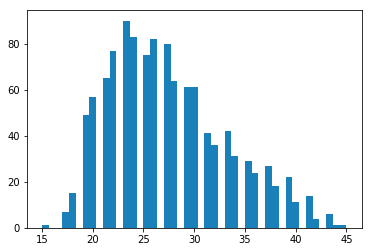

In [81]:
plt.hist(df['Maternal Age'], bins=45, density=False, alpha=0.9)

B) Utilizando o mesmo atributo, execute um bootstrap com 5000 amostras e plote a distribuição das medianas.

In [105]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

ma = df['Maternal Age'].values
print(bs.bootstrap(ma, stat_func=bs_stats.median))

26.0    (25.0, 26.0)


# Exercício 03:

Plote, em escala log-log, a distribuição dos dados no arquivo "lista.csv".

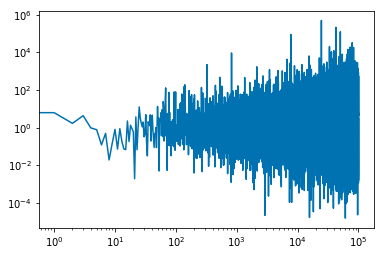

In [108]:
dados = pd.read_csv('lista.csv')['valores']
plt.loglog(dados)

A) Calcule a média, mediana, variância, e desvio padrão. Retorne em uma lista da seguinte forma:
```python
return [media,mediana,var,desvio]
```

In [122]:
def ex3(dados):
    mean = np.mean(dados)
    median = np.median(dados)
    var = np.var(dados)
    std = np.std(dados)
    return[mean, median, var, std]
    
ex3(dados)

[19.508920875736013,
 1.0042548724785347,
 3257557.3210686147,
 1804.8704443999893]

B) Calcule o intervalo de confiança, com confiança de 95%. Retorne em uma lista da seguinte forma:
```python
return [inferior,superior]
```

In [135]:
import scipy.stats
def ex3_IC(dados):
    mean = np.mean(dados)
    median = np.median(dados)
    conf_int = scipy.stats.norm.interval(0.95, loc=mean, scale=std) 
    return(conf_int[0], conf_int[1])
inf, sup = ex3_IC(dados)
print([inf, sup])

[-11.857333303452332, 50.875175054924355]


C) Plote a distribuição dos valores dos dados, em escala log-log. 

[-11.857333303452332, 50.875175054924355]


/home/matheusvargas/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


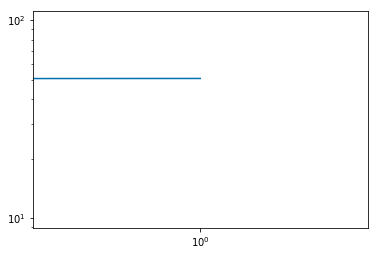

In [138]:
array = [inf, sup]
plt.loglog(array)

D) Tente explicar o por quê de os valores calculados ficaram tão elevados.

YOUR ANSWER HERE